In [32]:
#Installing relevant packages
!pip3 install beautifulSoup4
!pip3 install html5lib==1.1 
!pip3 install plotly

In [34]:

!pip3 install yfinance

In [35]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import html5lib

In [36]:
#The make_graph function takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2022-08-24']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2022-06-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [37]:
#Using the Ticker function Apple stock data is extracted to create a ticker object, its ticker symbol is AAPL. The history function is used to extract stock information from the ticker object, period is set to 10years.
Apple = yf.Ticker('AAPL')
apple_data = Apple.history(period = '10y')
apple_data.reset_index(inplace=True)
apple_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-09-24,21.035040,21.288002,20.916828,21.155396,639766400,0.0,0.0
1,2012-09-25,21.077905,21.216331,20.610569,20.627108,518789600,0.0,0.0
2,2012-09-26,20.480110,20.601078,20.249199,20.371086,576503200,0.0,0.0
3,2012-09-27,20.343832,20.891405,20.223169,20.865374,594090000,0.0,0.0
4,2012-09-28,20.786670,20.858945,20.419170,20.429890,535110800,0.0,0.0
...,...,...,...,...,...,...,...,...
2512,2022-09-19,149.309998,154.559998,149.100006,154.479996,81474200,0.0,0.0
2513,2022-09-20,153.399994,158.080002,153.080002,156.899994,107689800,0.0,0.0
2514,2022-09-21,157.339996,158.740005,153.600006,153.720001,101696800,0.0,0.0
2515,2022-09-22,152.380005,154.470001,150.910004,152.740005,86652500,0.0,0.0


In [38]:
#Micrsoft stock information is extracted with same approach
Microsoft = yf.Ticker('MSFT')
Msoft_data = Microsoft.history(period = '10y')
Msoft_data.reset_index(inplace=True)
Msoft_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-09-24,25.424851,25.482262,25.129594,25.244417,46825900,0.0,0
1,2012-09-25,25.383847,25.424855,24.899955,24.924559,54266400,0.0,0
2,2012-09-26,24.834339,25.096789,24.637502,24.744122,54672000,0.0,0
3,2012-09-27,24.744122,24.932757,24.514477,24.735920,47129900,0.0,0
4,2012-09-28,24.752329,24.817942,24.391460,24.407864,54229300,0.0,0
...,...,...,...,...,...,...,...,...
2512,2022-09-19,242.470001,245.139999,240.850006,244.520004,26826900,0.0,0
2513,2022-09-20,242.070007,243.509995,239.639999,242.449997,26660300,0.0,0
2514,2022-09-21,244.270004,247.660004,238.899994,238.949997,28625600,0.0,0
2515,2022-09-22,237.869995,243.860001,237.570007,240.979996,31061200,0.0,0


In [39]:
#Requests Library is used to download webpage with Apple revenues
url = "https://www.macrotrends.net/stocks/charts/AAPL/apple/revenue"
apple_html = requests.get(url).text
soup = BeautifulSoup(apple_html, 'html.parser')

In [40]:
#read_html function is used to extract the table with Apple Quarterly Revenue and store it into a dataframe
apple_revenue = pd.read_html(url, match = 'Apple Quarterly Revenue', flavor ='bs4')[0]
apple_revenue.columns=['Date','Revenue']
apple_revenue = apple_revenue[apple_revenue.Date>='2012-08-30']

In [41]:
apple_revenue["Revenue"] = apple_revenue['Revenue'].str.replace(',|\$',"")

C:\Users\USER\AppData\Local\Temp\ipykernel_11328\3599420262.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



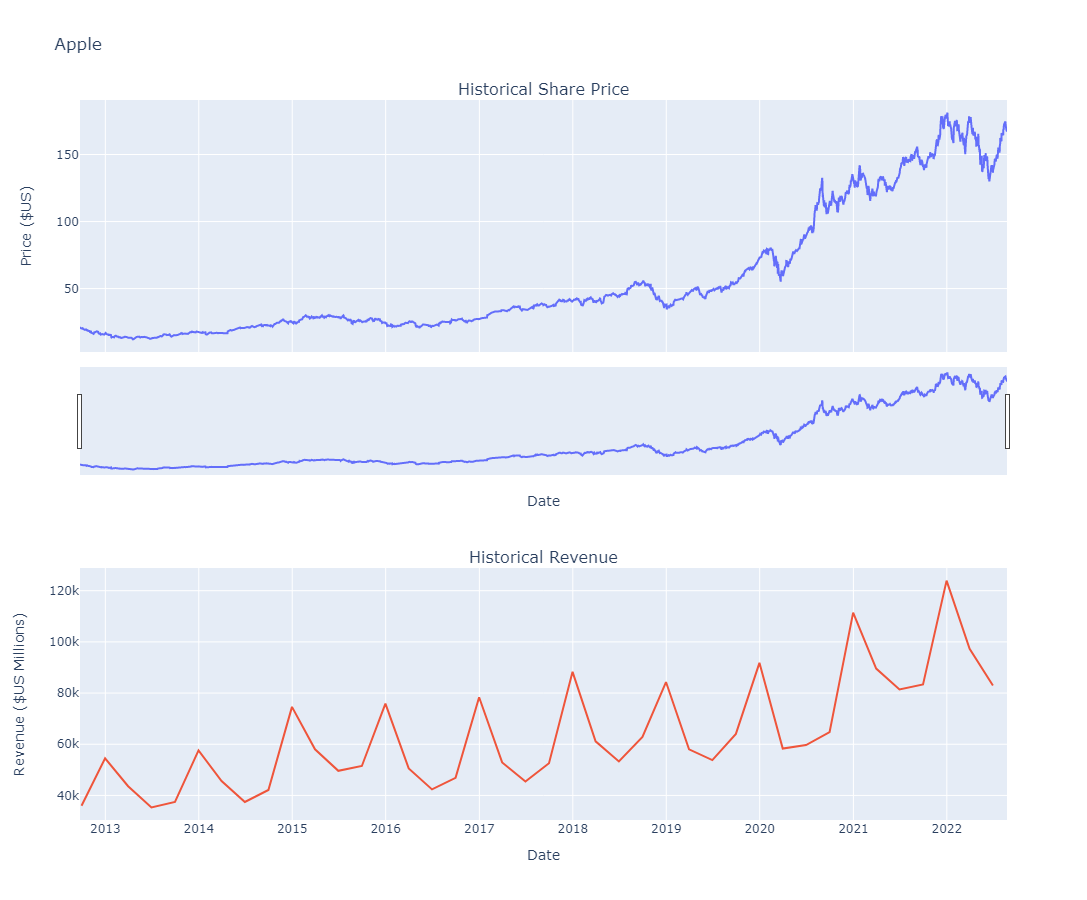

In [42]:
#Plotting the Apple Stock Data with make_graph
make_graph(apple_data, apple_revenue, 'Apple')

In [43]:
#Requests Library is used to download webpage with Microsoft Revenues
url = "https://www.macrotrends.net/stocks/charts/MSFT/microsoft/revenue"
Msoft_html = requests.get(url).text
soup = BeautifulSoup(Msoft_html, 'html.parser')

In [44]:
#read_html function is used to extract the table with Microsoft Quarterly Revenue and store it into a dataframe
Msoft_revenue = pd.read_html(url, match = 'Microsoft Quarterly Revenue', flavor ='bs4')[0]
Msoft_revenue.columns=['Date','Revenue']
Msoft_revenue = Msoft_revenue[Msoft_revenue.Date>='2012-08-30']

In [45]:
Msoft_revenue["Revenue"] = Msoft_revenue['Revenue'].str.replace(',|\$',"")

C:\Users\USER\AppData\Local\Temp\ipykernel_11328\205139496.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



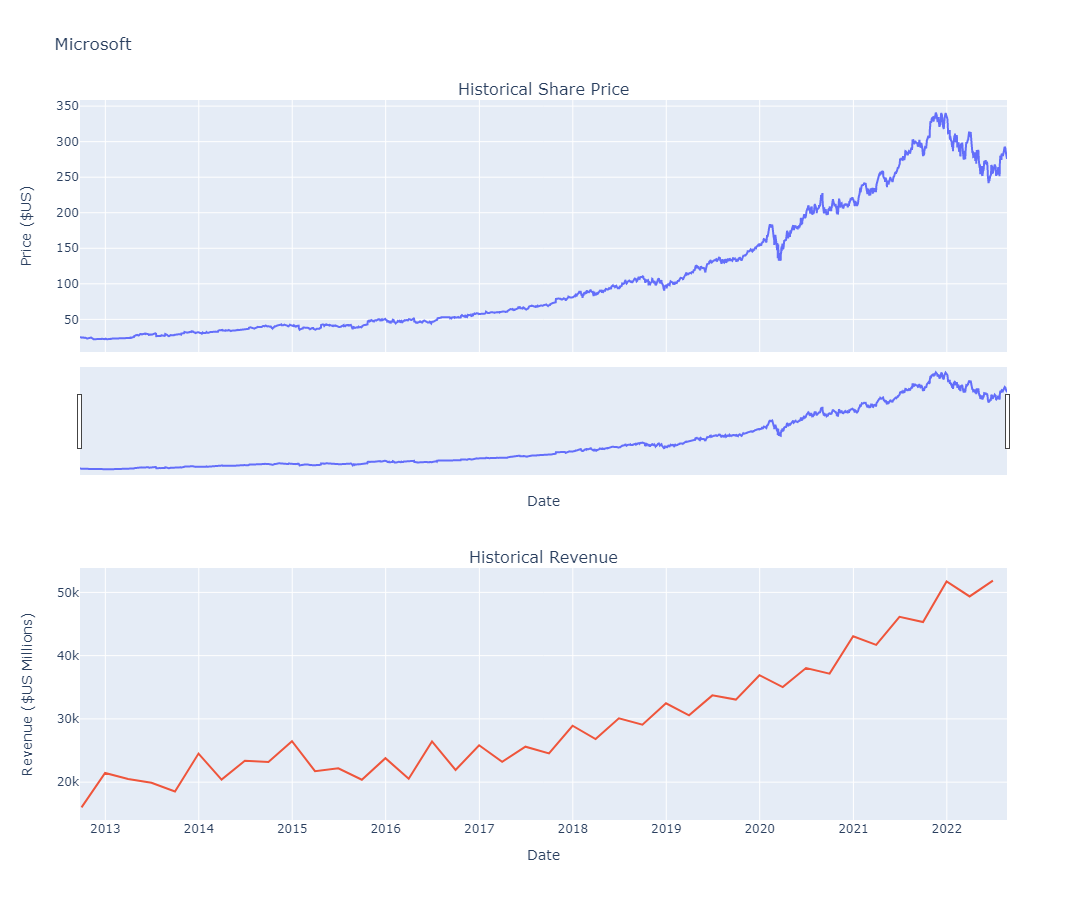

In [46]:
#Plotting the Apple Stock Data with make_graph
make_graph(Msoft_data, Msoft_revenue, 'Microsoft')